importing the libraries and the data and showing only few headings

In [2]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv(r'../data/benin-malanville.csv')


print(data.head())




          Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-08-09 00:01 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
1  2021-08-09 00:02 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
2  2021-08-09 00:03 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   
3  2021-08-09 00:04 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7   
4  2021-08-09 00:05 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
0      0.1  122.1      0.0  998         0            0.0   26.3   26.2   
1      0.0    0.0      0.0  998         0            0.0   26.3   26.2   
2      0.5  124.6      1.5  997         0            0.0   26.4   26.2   
3      0.4  120.3      1.3  997         0            0.0   26.4   26.3   
4      0.3  113.2      1.0  997         0            0.0   26.4   26.3   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN  


Calculate mean, median, standard deviation, and other statistical measures for numeric columns to understand data distribution.

In [3]:


#display a basic statistic
print(data.describe())



                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      240.559452     167.187516     115.358961     236.589496   
std       331.131327     261.710501     158.691074     326.894859   
min       -12.900000      -7.800000     -12.600000       0.000000   
25%        -2.000000      -0.500000      -2.100000       0.000000   
50%         1.800000      -0.100000       1.600000       4.500000   
75%       483.400000     314.200000     216.300000     463.700000   
max      1413.000000     952.300000     759.200000    1342.300000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      228.883576      28.179683      54.487969       2.121113   
std       316.536515       5.924297      28.073069       1.603466   
min         0.000000      11.000000       2.100000       0.000000   
25%         0.000000      24.2000

Check for missing values, outliers, or incorrect entries.

In [6]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

# Detect outliers using Z-score
from scipy.stats import zscore

numeric_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']  # Update based on your dataset
z_scores = data[numeric_cols].apply(zscore)
outliers = (z_scores.abs() > 3).sum()
print("Outliers Detected:\n", outliers)


Missing Values:
 Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64
Outliers Detected:
 GHI         89
DNI          0
DHI       3738
ModA        27
ModB        63
WS        3109
WSgust    3500
dtype: int64


Time Series Analysis
Analyze trends over time for GHI, DNI, DHI, and Tamb. 

<Figure size 1500x600 with 0 Axes>

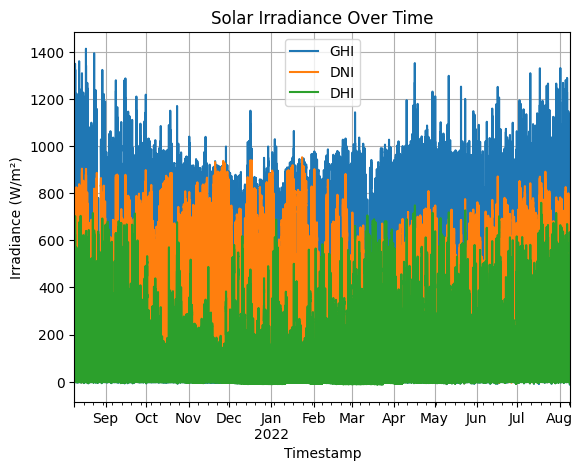

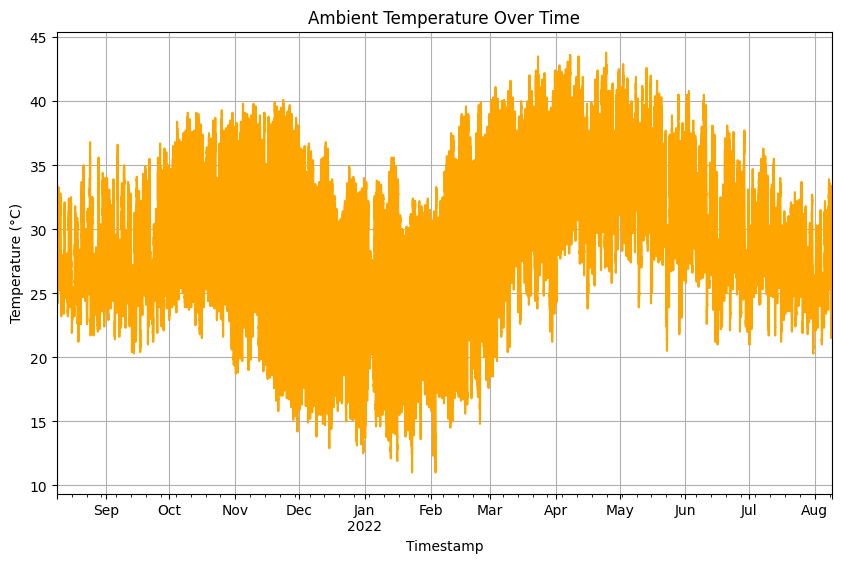

In [ ]:
import matplotlib.pyplot as plt

# Ensure Timestamp is a datetime object

data['Timestamp'] = pd.to_datetime(data['Timestamp'])

# Set Timestamp as the index

data.set_index('Timestamp', inplace=True)

# Plot time series for GHI, DNI, DHI

plt.figure(figsize=(15, 6))
data[['GHI', 'DNI', 'DHI']].plot()
plt.title('Solar Irradiance Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Irradiance (W/m²)')
plt.grid(True)
plt.show()

# Plot time series for ambient temperature (Tamb)
plt.figure(figsize=(10, 6))
data['Tamb'].plot(color='orange')
plt.title('Ambient Temperature Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()


Evaluate Impact of Cleaning
Analyzing how cleaning affects sensor readings (ModA, ModB).


Impact of Cleaning:
                 ModA        ModB
Cleaning                        
0         236.524253  228.816071
1         307.229278  301.972165


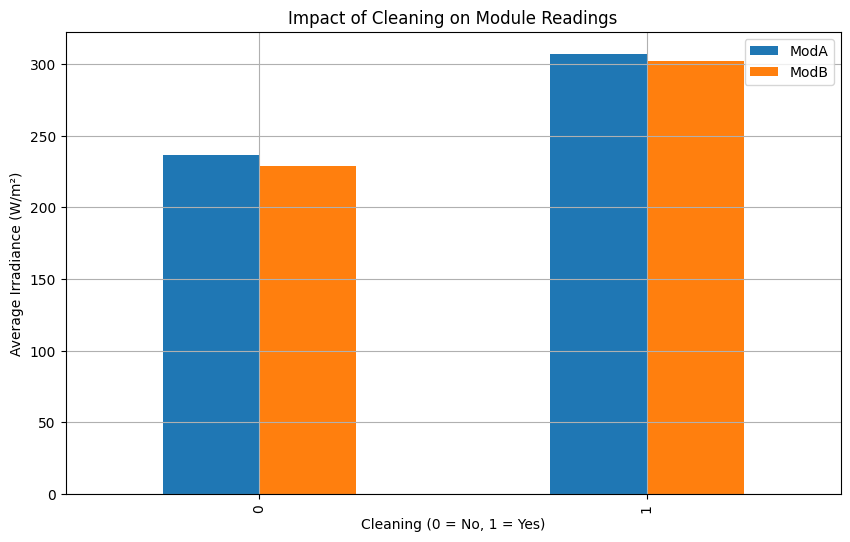

In [8]:
# Group by Cleaning and calculate means for ModA and ModB

cleaning_effect = data.groupby('Cleaning')[['ModA', 'ModB']].mean()
print("Impact of Cleaning:\n", cleaning_effect)

# Plot the impact
cleaning_effect.plot(kind='bar', figsize=(10, 6))
plt.title('Impact of Cleaning on Module Readings')
plt.ylabel('Average Irradiance (W/m²)')
plt.xlabel('Cleaning (0 = No, 1 = Yes)')
plt.grid(True)
plt.show()


Visualize correlations between solar radiation and temperature measures.

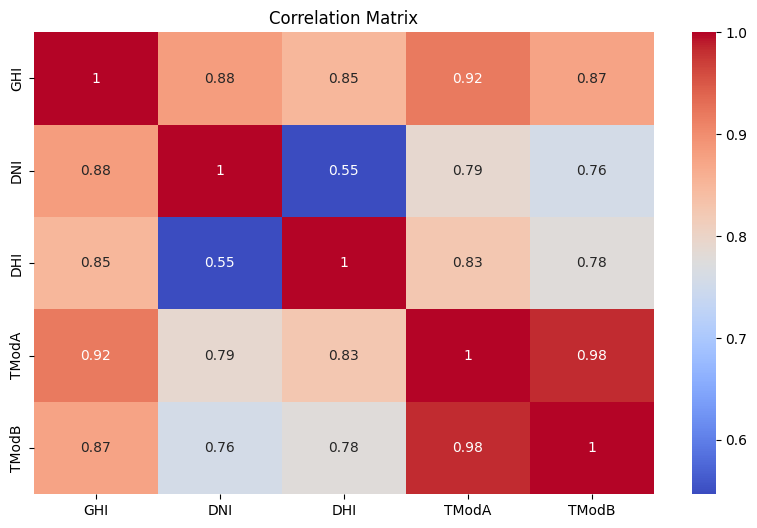

In [9]:
import seaborn as sns

# Correlation matrix
corr_matrix = data[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']].corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


Wind Analysis
Visualize wind speed and direction.

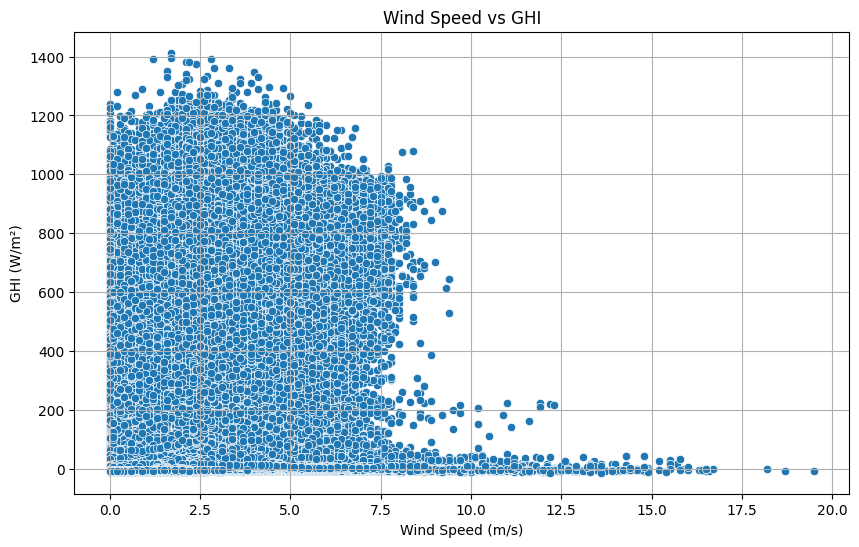

In [10]:
# Scatter plot of Wind Speed (WS) vs GHI
plt.figure(figsize=(10, 6))
sns.scatterplot(x='WS', y='GHI', data=data)
plt.title('Wind Speed vs GHI')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('GHI (W/m²)')
plt.grid(True)
plt.show()


Temperature Analysis
Examine how relative humidity (RH) influences temperature and solar radiation.

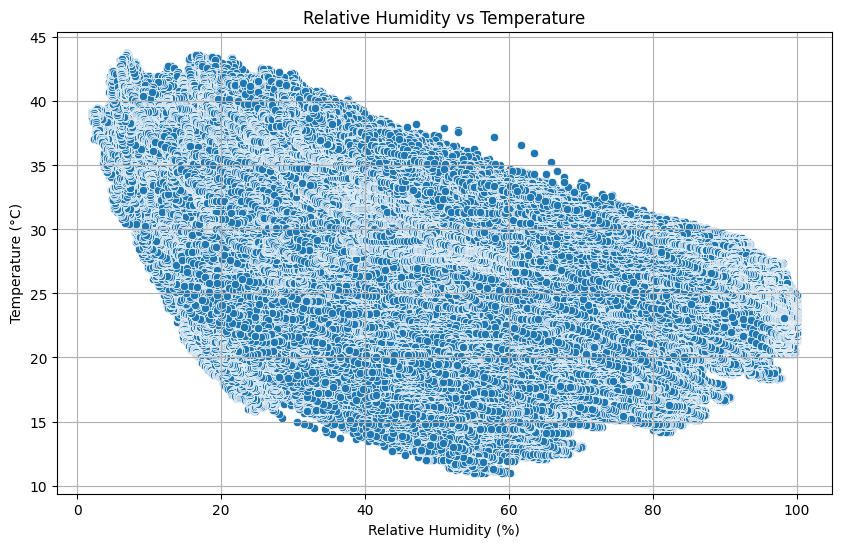

In [11]:
# Scatter plot of RH vs Tamb
plt.figure(figsize=(10, 6))
sns.scatterplot(x='RH', y='Tamb', data=data)
plt.title('Relative Humidity vs Temperature')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()


Histograms
Visualize distributions of key variables

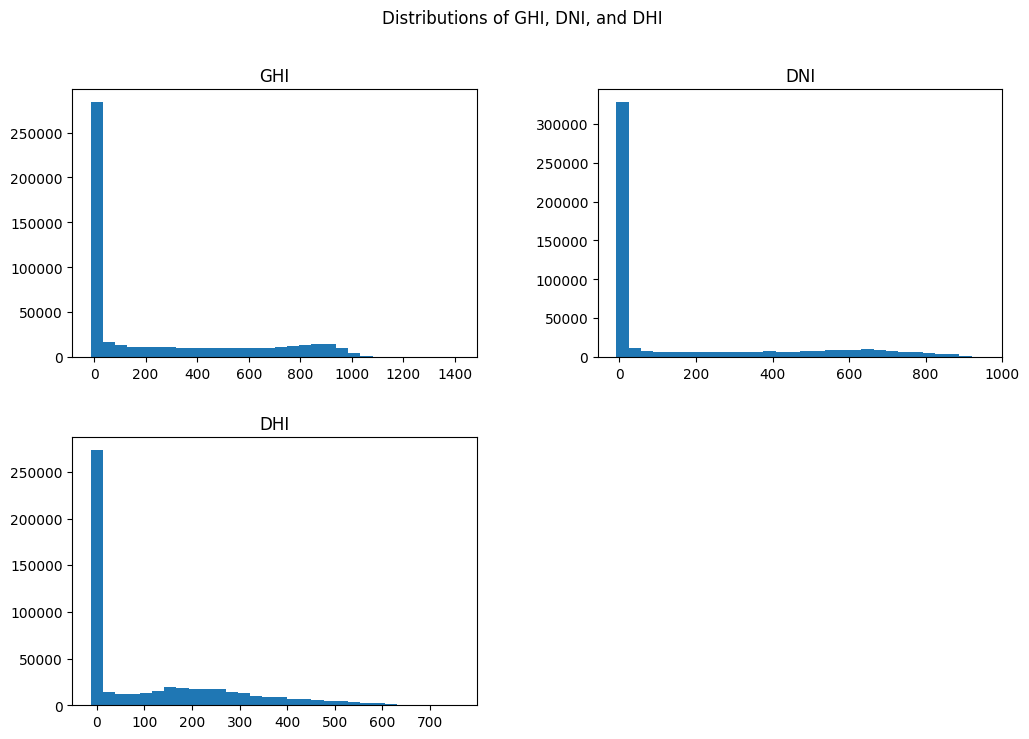

In [12]:
# Plot histograms for GHI, DNI, and DHI
data[['GHI', 'DNI', 'DHI']].hist(bins=30, figsize=(12, 8), grid=False)
plt.suptitle('Distributions of GHI, DNI, and DHI')
plt.show()


Z-Score Analysis
Identify data points that deviate significantly from the mean

In [13]:
# Calculate Z-scores for GHI
z_scores = zscore(data['GHI'])
outliers = data[z_scores.abs() > 3]
print("Outliers in GHI:\n", outliers)


Outliers in GHI:
                         GHI    DNI    DHI    ModA    ModB  Tamb    RH   WS  \
Timestamp                                                                    
2021-08-09 11:12:00  1274.0  698.8  615.2  1210.3  1210.3  30.1  69.6  3.4   
2021-08-09 11:15:00  1349.0  771.8  618.0  1281.5  1281.5  30.9  67.1  4.0   
2021-08-09 11:17:00  1334.0  751.9  620.0  1267.3  1267.3  31.1  67.0  2.7   
2021-08-09 14:10:00  1253.0  714.8  552.5  1156.0  1155.0  31.0  64.2  3.3   
2021-08-09 14:11:00  1324.0  813.0  532.3  1218.0  1217.0  31.0  62.9  2.2   
...                     ...    ...    ...     ...     ...   ...   ...  ...   
2022-08-03 13:38:00  1268.0  652.5  612.1  1163.0  1150.0  30.1  70.7  2.7   
2022-08-05 13:40:00  1280.0  778.5  497.2  1168.0  1161.0  29.0  70.3  3.8   
2022-08-05 14:17:00  1244.0  745.2  530.4  1126.0  1118.0  30.8  64.3  3.0   
2022-08-06 13:15:00  1262.0  772.4  475.8  1166.0  1153.0  31.1  66.0  3.4   
2022-08-06 13:16:00  1289.0  758.1  519.2  119

Bubble Charts
Visualize relationships with additional dimensions.

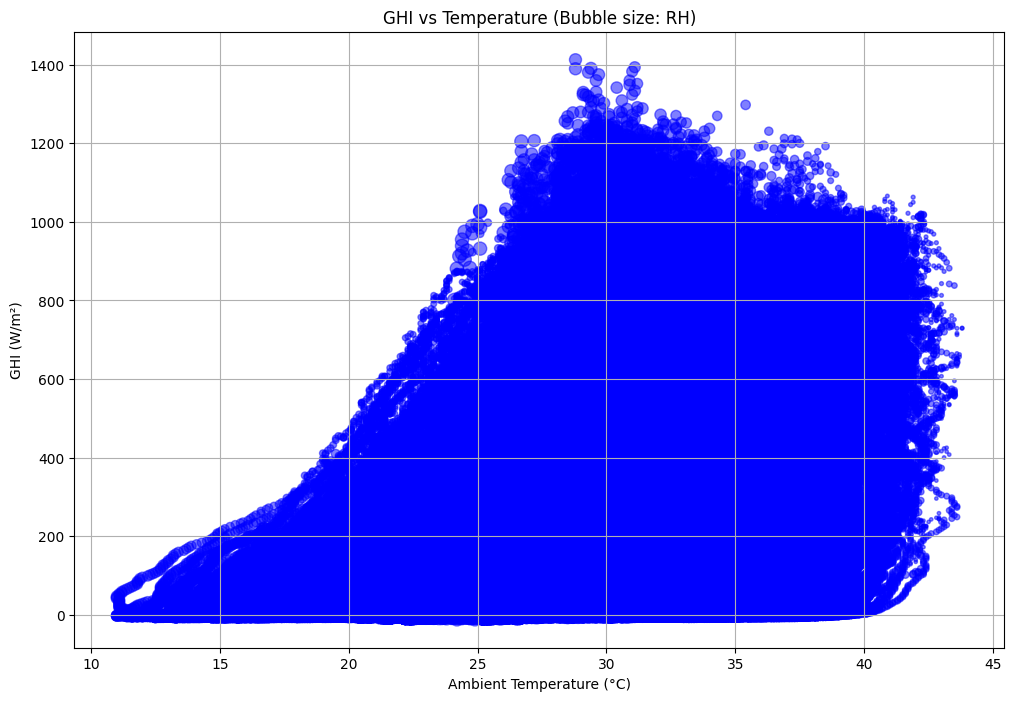

In [14]:
# Bubble chart: GHI vs Tamb vs WS with RH as bubble size
plt.figure(figsize=(12, 8))
plt.scatter(data['Tamb'], data['GHI'], s=data['RH'], alpha=0.5, c='blue')
plt.title('GHI vs Temperature (Bubble size: RH)')
plt.xlabel('Ambient Temperature (°C)')
plt.ylabel('GHI (W/m²)')
plt.grid(True)
plt.show()


Data Cleaning
Handle anomalies and missing values.

In [15]:
# Fill missing values with the median
data.fillna(data.median(), inplace=True)

# Drop columns with mostly null values (e.g., Comments)
data.drop(columns=['Comments'], inplace=True)


Renamed key columns to make their purpose explicit.

In [16]:
data.rename(columns={
    'GHI': 'Global_Horizontal_Irradiance',
    'DNI': 'Direct_Normal_Irradiance',
    'DHI': 'Diffuse_Horizontal_Irradiance'
}, inplace=True)
